In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [3]:
data = pd.read_csv('final-dataset.csv')

In [4]:
data

,Signal,Mean (µV),RMS (µV),MRS (µV),Zero Crossings,Frequency (Hz),Delta (µV² /Hz),Theta (µV² /Hz),Alpha (µV² /Hz),Beta (µV² /Hz),Gamma (µV² /Hz),Skewness,Variance,Kurtosis,Hjorth Mobility,Hjorth Complexity,Spectral Entropy,Hurst Component,Label
0,e1.1,-111.543263,165.326922,137.464510,6,3.0,13.871195,0.216515,0.157400,0.471267,0.360638,0.239330,615.079709,0.910075,0.022921,73.652201,0.182409,NaN,0
1,e1.2,-85.046038,140.633143,111.886389,6,3.0,5.126801,0.176441,0.151454,0.471898,0.364846,0.342664,591.548572,1.188751,0.026908,62.185689,0.342378,0.749905,0
2,e1.3,-46.838299,126.812428,85.819704,16,8.0,1.261876,0.181805,0.161871,0.472354,0.372668,0.162705,597.730063,1.117822,0.019291,77.478691,0.640952,NaN,0
3,e1.4,-47.013536,143.652350,91.850550,7,3.5,0.899144,0.212408,0.298429,0.738894,0.501854,0.070902,881.616631,0.533297,0.018705,89.823036,0.727563,NaN,0
4,e1.5,-15.339653,113.011520,53.273050,24,12.0,0.423585,0.195163,0.150992,0.484105,0.371071,0.118651,590.152352,1.311522,0.025437,72.822080,0.737258,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395,e44.16,36.186700,212.914300,183.361700,16,8.0,4.773178,0.057969,0.056995,0.064938,0.028870,-0.215252,4546.932985,-0.300456,0.013047,183.012787,0.124612,NaN,1
1396,e44.17,16.071300,197.450300,164.779100,16,8.0,4.597643,0.086384,0.079297,0.070025,0.023665,-0.273938,4531.675869,-0.580865,0.011399,187.310378,0.156523,0.795698,1
1397,e44.18,26.099800,179.550900,150.289800,12,6.0,3.820986,0.075286,0.063749,0.075981,0.025731,-0.102428,4421.209140,-0.564450,0.011609,196.145342,0.168403,0.797093,1
1398,e44.19,8.691700,180.441800,156.137900,8,4.0,3.697704,0.048950,0.050061,0.063681,0.028765,-0.068861,4396.225067,-0.394728,0.012525,173.992468,0.140683,NaN,1


In [5]:
X = data.drop(columns=['Signal','Label','Hurst Component'])
y = data['Label']

In [6]:
features = X.columns
features

Index(['Mean (µV)', 'RMS (µV)', 'MRS (µV)', 'Zero Crossings', 'Frequency (Hz)',
       'Delta (µV² /Hz)', 'Theta (µV² /Hz)', 'Alpha (µV² /Hz)',
       'Beta (µV² /Hz)', 'Gamma (µV² /Hz)', 'Skewness', 'Variance', 'Kurtosis',
       'Hjorth Mobility', 'Hjorth Complexity', 'Spectral Entropy'],
      dtype='object')

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [7]:
x_val, x_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=0)

In [8]:
from sklearn import preprocessing as pre
X_train = pre.scale(X_train)
x_test = pre.scale(x_test)
x_val = pre.scale(x_val)
X_train.shape

(980, 16)

In [7]:
from sklearn.model_selection import GridSearchCV

In [8]:
from sklearn.ensemble import RandomForestClassifier
parameters = {'criterion':('gini', 'entropy'), 'class_weight':('balanced', 'balanced_subsample'), 'max_features':('auto', 'sqrt','log2')}
clf = RandomForestClassifier(random_state=0)
clf = GridSearchCV(clf, parameters)

In [11]:
clf.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(random_state=0),
             param_grid={'class_weight': ('balanced', 'balanced_subsample'),
                         'criterion': ('gini', 'entropy'),
                         'max_features': ('auto', 'sqrt', 'log2')})

In [12]:
clf.best_params_

{'class_weight': 'balanced', 'criterion': 'entropy', 'max_features': 'auto'}

In [13]:
clf.score(x_val, y_val)

0.5476190476190477

In [14]:
clf.score(x_test, y_test)

0.5952380952380952

In [15]:
y_pred = clf.predict(x_test)
from sklearn.metrics import confusion_matrix
y_true = y_test
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
specificity = tn / (tn+fp)
print("Specificity is : " , specificity)
accuracy = (tp + tn) / (tp + tn + fp + fn)
print("Accuracy is : " , accuracy)
sensitivity = tp / (tp + fn)
print("Sensitivity is : " , sensitivity)

Specificity is :  0.39622641509433965
Accuracy is :  0.5952380952380952
Sensitivity is :  0.7980769230769231


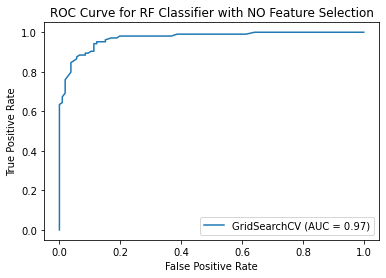

In [10]:
import matplotlib.pyplot as plt  
from sklearn import preprocessing as pre
from sklearn import datasets, metrics, model_selection

X = pre.scale(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
x_val, x_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=0)
clf = RandomForestClassifier(random_state=0)
clf = GridSearchCV(clf, parameters)
clf.fit(X_train, y_train)
metrics.plot_roc_curve(clf, x_test, y_test) 
plt.title("ROC Curve for RF Classifier with NO Feature Selection")
plt.show()  